In [ ]:
#import needed pacges and import the excel file

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_excel(r'C:\Users\BAMISILE\Desktop\da\Analytics_Project_File.xlsx', sheet_name ='EXT0070122021')
geo = pd.read_excel(r'C:\Users\BAMISILE\Desktop\da\Analytics_Project_File.xlsx', sheet_name ='Sheet3')

In [ ]:
#Explore the data
#checking through the data and see how it looks and be familiar with it
#removing the # sign to check the result of each line of code

In [28]:
df
#df.describe()
#df.dtypes

,CLID,Date,Vol
0,CL11420,03/31/2020,884
1,NaN,04/30/2020,886
2,NaN,05/31/2020,968
3,NaN,06/30/2020,564
4,NaN,07/31/2020,648
...,...,...,...
902,NaN,05/31/2021,290
903,NaN,04/30/2021,294
904,NaN,03/31/2021,270
905,NaN,02/28/2021,224


In [29]:
geo.describe()
geo.dtypes
geo.head()

,CLID,GEOID,Unnamed: 2
0,C-CL69323,GEO1001,NaN
1,C-CL97995,GEO1001,NaN
2,C-CL87299,GEO1003,NaN
3,C-CL38496,GEO1001,NaN
4,C-CL75562,GEO1003,NaN


In [36]:
#Filling the missing values on the CLID column on the df data
df['CLID'].fillna(method='ffill', inplace = True)
df

,CLID,Date,Vol
0,CL11420,03/31/2020,884
1,CL11420,04/30/2020,886
2,CL11420,05/31/2020,968
3,CL11420,06/30/2020,564
4,CL11420,07/31/2020,648
...,...,...,...
902,CL99768,05/31/2021,290
903,CL99768,04/30/2021,294
904,CL99768,03/31/2021,270
905,CL99768,02/28/2021,224


In [44]:
#changing the date format on the df data to pandas date format
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df["Date"].dt.year
df['Quarter'] = df['Date'].dt.quarter
df['Year_Quarter'] = df['Year'].astype(str) + '-' + df['Quarter'].astype(str)
df.head()

,CLID,Date,Vol,Year,Quarter,Year_Quarter
0,CL11420,2020-03-31,884,2020,1,2020-1
1,CL11420,2020-04-30,886,2020,2,2020-2
2,CL11420,2020-05-31,968,2020,2,2020-2
3,CL11420,2020-06-30,564,2020,2,2020-2
4,CL11420,2020-07-31,648,2020,3,2020-3


In [42]:
df['Date'].min()

Timestamp('2020-01-31 00:00:00')

In [43]:
df['Date'].max()

Timestamp('2021-06-30 00:00:00')

In [46]:
#clean geodata
Removing the C- in the CLID data so it can look like the CLID column in df data
geo['CLID'] = geo['CLID'].str.replace('C-', '')
geo.head()

,CLID,GEOID,Unnamed: 2
0,CL69323,GEO1001,NaN
1,CL97995,GEO1001,NaN
2,CL87299,GEO1003,NaN
3,CL38496,GEO1001,NaN
4,CL75562,GEO1003,NaN


In [50]:
#creating a dictionary so that CLID column can match up with the GEOID column
geodict = geo.copy()
geodict.index = geo['CLID']
geodict = geodict['GEOID'].to_dict()
geodict

{'CL69323': 'GEO1001',
 'CL97995': 'GEO1001',
 'CL87299': 'GEO1003',
 'CL38496': 'GEO1001',
 'CL75562': 'GEO1003',
 'CL31601': 'GEO1001',
 'CL33189': 'GEO1001',
 'CL22140': 'GEO1001',
 'CL49960': 'GEO1002',
 'CL43946': 'GEO1004',
 'CL37714': 'GEO1001',
 'CL75274': 'GEO1002',
 'CL61534': 'GEO1001',
 'CL85641': 'GEO1004',
 'CL46663': 'GEO1001',
 'CL17270': 'GEO1001',
 'CL57593': 'GEO1001',
 'CL96680': 'GEO1001',
 'CL79204': 'GEO1001',
 'CL83029': 'GEO1001',
 'CL22675': 'GEO1004',
 'CL83083': 'GEO1002',
 'CL36191': 'GEO1004',
 'CL81431': 'GEO1004',
 'CL96487': 'GEO1002',
 'CL52426': 'GEO1001',
 'CL64939': 'GEO1001',
 'CL50651': 'GEO1001',
 'CL13213': 'GEO1001',
 'CL90358': 'GEO1003',
 'CL71409': 'GEO1003',
 'CL24510': 'GEO1002',
 'CL95487': 'GEO1002',
 'CL23634': 'GEO1004',
 'CL50297': 'GEO1001',
 'CL35993': 'GEO1002',
 'CL60563': 'GEO1002',
 'CL11420': 'GEO1004',
 'CL13257': 'GEO1003',
 'CL94846': 'GEO1001',
 'CL87149': 'GEO1003',
 'CL49900': 'GEO1004',
 'CL29380': 'GEO1003',
 'CL37879':

In [52]:
#Get GeoId into the df data
df['GEOID'] = df['CLID'].map(geodict)
df

,CLID,Date,Vol,Year,Quarter,Year_Quarter,GEOID
0,CL11420,2020-03-31,884,2020,1,2020-1,GEO1004
1,CL11420,2020-04-30,886,2020,2,2020-2,GEO1004
2,CL11420,2020-05-31,968,2020,2,2020-2,GEO1004
3,CL11420,2020-06-30,564,2020,2,2020-2,GEO1004
4,CL11420,2020-07-31,648,2020,3,2020-3,GEO1004
...,...,...,...,...,...,...,...
902,CL99768,2021-05-31,290,2021,2,2021-2,GEO1002
903,CL99768,2021-04-30,294,2021,2,2021-2,GEO1002
904,CL99768,2021-03-31,270,2021,1,2021-1,GEO1002
905,CL99768,2021-02-28,224,2021,1,2021-1,GEO1002


In [58]:
#checking the volume of sales in different locations (GEOID) at different quarters
q12020 = df[df['Year_Quarter'] == '2020-1']
q12020vol = q12020.groupby(['GEOID'])['Vol'].sum()
q12020vol

GEOID
GEO1001    509419
GEO1002     95736
GEO1003    147852
GEO1004     69053
Name: Vol, dtype: int64

In [59]:
q22020 = df[df['Year_Quarter'] == '2020-2']
q22020vol = q22020.groupby(['GEOID'])['Vol'].sum()
q22020vol

GEOID
GEO1001    576618
GEO1002    107338
GEO1003    173566
GEO1004     82618
Name: Vol, dtype: int64

In [79]:
Qs = df.groupby(['Year_Quarter']).sum()
Qs

,Vol,Year,Quarter
Year_Quarter,,,
2020-1,822060,290880,144
2020-2,940140,298960,296
2020-3,587002,311080,462
2020-4,706563,319160,632
2021-1,855266,315276,156
2021-2,965282,297087,294


In [ ]:
#Simple barchat for volumes of different quarters

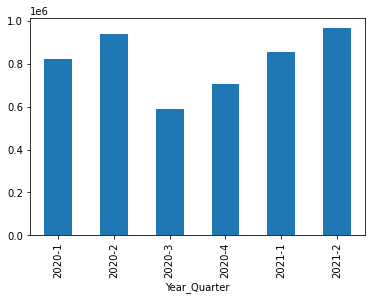

In [83]:
Qs = df.groupby(['Year_Quarter']).Vol.sum().plot(kind= 'bar')